## Football Data Analysis with Python and ML algorithm : 

#### > Import library : 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline
## for machine learning
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

# Fine-tune
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


C:\Users\paras\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\paras\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\paras\miniconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### > Read Data : 

In [2]:
df_odds = pd.read_csv('./input/odds.csv')
df_odds.head()

,MatchID,Home,Draw,Away
0,1,1.92,3.96,3.89
1,2,2.16,3.88,3.23
2,3,1.21,7.65,13.17
3,4,1.05,17.00,43.49
4,5,3.12,3.60,2.32


In [3]:
df_results = pd.read_csv('./input/results.csv')
df_results.head()

,SeasonID,Gameweek,MatchID,HomeTeamID,HomeScore,HomeShots,AwayTeamID,AwayScore,AwayShots
0,1,1,1,7,1,17,1,1,12
1,1,1,2,6,1,8,8,3,17
2,1,1,3,5,5,21,9,1,7
3,1,1,4,4,2,25,10,0,8
4,1,1,5,3,3,13,11,3,19


In [4]:
df_Teams = pd.read_csv('./input/teams.csv')
df_Teams.head()

,TeamName,TeamID
0,Arlington,1
1,Anaheim,2
2,Atlanta,3
3,Baltimore,4
4,Boston,5


#### > merge 2 dataframe : 

In [5]:
df = pd.merge(df_results, df_odds, on = "MatchID", how = "inner")
df.head()

,SeasonID,Gameweek,MatchID,HomeTeamID,HomeScore,HomeShots,AwayTeamID,AwayScore,AwayShots,Home,Draw,Away
0,1,1,1,7,1,17,1,1,12,1.92,3.96,3.89
1,1,1,2,6,1,8,8,3,17,2.16,3.88,3.23
2,1,1,3,5,5,21,9,1,7,1.21,7.65,13.17
3,1,1,4,4,2,25,10,0,8,1.05,17.00,43.49
4,1,1,5,3,3,13,11,3,19,3.12,3.60,2.32


#### > 1-1 ) The hero of the first season : 

In [6]:
# create df from season 1 : 
df_season1 = df[df['SeasonID'] == 1]
HomeScore , AwayScore = df_season1['HomeScore'].to_list() , df_season1['AwayScore'].to_list()
Score_For_Home , Score_For_Away = [] , []
for number in range(0 , len(HomeScore)) :
    if AwayScore[number] ==  HomeScore[number] : 
        Score_For_Away.append(1)
        Score_For_Home.append(1)
    elif AwayScore[number] >  HomeScore[number] : 
        Score_For_Away.append(3)
        Score_For_Home.append(0)
    else : 
        Score_For_Home.append(3)
        Score_For_Away.append(0)
# new df : 
df_season1.insert(3 , "Score_For_Home", Score_For_Home, True)
df_season1.insert(4 , "Score_For_Away", Score_For_Away, True)
df_season1 = df_season1[['HomeTeamID' , 'AwayTeamID' , 'Score_For_Home' , 'Score_For_Away']]
# Group By : 
df_season1_group_by_HomeTeamID = df_season1.groupby(['HomeTeamID'])
df_season1_group_by_AwayTeamID = df_season1.groupby(['AwayTeamID'])
Score = {}
for Team in range(1 , max(list(df_season1['AwayTeamID' ].unique())) + 1) : 
    score1 = df_season1_group_by_HomeTeamID.get_group(Team)['Score_For_Home'].sum()
    score2 = df_season1_group_by_AwayTeamID.get_group(Team)['Score_For_Away'].sum()
    Score[list(df_Teams[df_Teams['TeamID'] == Team]['TeamName'])[0]] = score1 + score2

Score_season1 = Score.copy()
df_Teams.insert(2 , "Points", Score_season1.values(), False)
League_table = df_Teams[['TeamName','Points']]
League_table = League_table.sort_values('Points',ascending=False)
Hero_index = list(Score.values()).index(max(list(Score.values())))
Hero = list(Score.keys())[Hero_index]

print('Hero : {} ; Points = {}'.format(Hero , max(list(Score.values()))))

Hero : Miami ; Points = 138


In [7]:
League_table

,TeamName,Points
14,Miami,138
7,Cincinnati,125
3,Baltimore,117
18,New York S,113
4,Boston,106
26,Seattle,105
5,Chicago B,105
20,Oakland,96
6,Chicago H,95
23,St. Louis,94


#### > 1-2 ) Hero Time : 

In [8]:
# Seccound Hero : 
Score_values = list(Score.values())
Score_values.remove(max(list(Score.values())))
Score_Keys = list(Score.keys())
Score_Keys.remove(Hero)

Seccound_Hero_index = Score_values.index(max(Score_values))
Seccound_Hero = Score_Keys[Seccound_Hero_index]

# Heros ID : 
Hero_ID = list(df_Teams[df_Teams['TeamName'] == Hero]['TeamID'])[0]
Seccound_Hero_ID = list(df_Teams[df_Teams['TeamName'] == Seccound_Hero]['TeamID'])[0]

df_season1['GameWeek'] = df['Gameweek']
df_season1_group_by_GameWeek = df_season1.groupby(['GameWeek'])

Seccound_Hero_Score_per_week , Hero_Score_per_week = 0 , 0
for week in range(1 , max(list(df_season1['GameWeek' ].unique())) + 1) : 
    # Hero : 
    if Hero_ID in df_season1_group_by_GameWeek.get_group(week)['HomeTeamID'].tolist() :
        new_df = df_season1_group_by_GameWeek.get_group(week)
        Hero_Score_per_week += list(new_df[new_df['HomeTeamID'] == Hero_ID]['Score_For_Home'])[0]
    else : 
        new_df = df_season1_group_by_GameWeek.get_group(week)
        Hero_Score_per_week += list(new_df[new_df['AwayTeamID'] == Hero_ID]['Score_For_Away'])[0]
    
    # Seccound Hero : 
    if Seccound_Hero_ID in df_season1_group_by_GameWeek.get_group(week)['HomeTeamID'].tolist() :
        new_df = df_season1_group_by_GameWeek.get_group(week)
        Seccound_Hero_Score_per_week += list(new_df[new_df['HomeTeamID'] == Seccound_Hero_ID]['Score_For_Home'])[0]
    else : 
        new_df = df_season1_group_by_GameWeek.get_group(week)
        Seccound_Hero_Score_per_week += list(new_df[new_df['AwayTeamID'] == Seccound_Hero_ID]['Score_For_Away'])[0]
    
    # Hero week :
    if (Hero_Score_per_week - Seccound_Hero_Score_per_week) > (max(list(df_season1['GameWeek' ].unique())) - week) * 3 :
        break 

print('Hero week : ' , week)

Hero week :  50


#### > 1-3 ) What result was the biggest upset?

In [9]:
new_df = df[['Gameweek' , 'HomeTeamID' , 'AwayTeamID' ,'HomeScore' , 'AwayScore' , 'Home' , 'Draw' , 'Away']]
new_df['Upset_real'] = new_df['HomeScore'] - new_df['AwayScore']
new_df['Upset_predict'] = new_df['Home'] - new_df['Away']
new_df['Upset'] = (new_df['Upset_predict'] - new_df['Upset_real']).abs()


week = list(new_df[new_df['Upset'] == new_df['Upset'].max()][['Gameweek' , 'HomeTeamID' , 'AwayTeamID']]['Gameweek'])[0]
hometeamID = list(new_df[new_df['Upset'] == new_df['Upset'].max()][['Gameweek' , 'HomeTeamID' , 'AwayTeamID']]['HomeTeamID'])[0]
awayteamID = list(new_df[new_df['Upset'] == new_df['Upset'].max()][['Gameweek' , 'HomeTeamID' , 'AwayTeamID']]['AwayTeamID'])[0]

hometeamName = list(df_Teams[df_Teams['TeamID'] == hometeamID]['TeamName'])[0]
awayteamName = list(df_Teams[df_Teams['TeamID'] == awayteamID]['TeamName'])[0]

print('in week {} between {} and {}'.format(week , hometeamName , awayteamName))

in week 31 between Miami and Denver


#### > 2-1 ) Season 2 pridiction : 

In [10]:

# append data to df : 
df_season1_new = df[[ 'Gameweek','HomeTeamID' , 'AwayTeamID' , 'AwayScore' , 'HomeScore']]

mean_Home_Goal_For = df_season1_new['HomeScore'].sum() / df_season1_new['HomeScore'].shape[0]
mean_Away_Goal_For = df_season1_new['AwayScore'].sum() / df_season1_new['AwayScore'].shape[0]
mean_Home_Goal_Against = df_season1_new['HomeScore'].sum() / df_season1_new['HomeScore'].shape[0]
mean_Away_Goal_Against = df_season1_new['AwayScore'].sum() / df_season1_new['AwayScore'].shape[0]

Goal_Away_For , Goal_Home_For = {} , {}
Goal_Away_Against , Goal_Home_Against = {} , {}

for team in range(1 , df['HomeTeamID'].max() + 1) : 
    Goal_Home_For[team] = df_season1_new[df_season1_new['HomeTeamID'] == team]['HomeScore'].sum() / df_season1_new[df_season1_new['HomeTeamID'] == team]['HomeScore'].shape[0]
    Goal_Away_For[team] = df_season1_new[df_season1_new['AwayTeamID'] == team]['AwayScore'].sum() / df_season1_new[df_season1_new['AwayTeamID'] == team]['AwayScore'].shape[0]
   
    Goal_Home_Against[team] = df_season1_new[df_season1_new['HomeTeamID'] == team]['AwayScore'].sum() / df_season1_new[df_season1_new['HomeTeamID'] == team]['AwayScore'].shape[0]
    Goal_Away_Against[team] = df_season1_new[df_season1_new['AwayTeamID'] == team]['HomeScore'].sum() / df_season1_new[df_season1_new['AwayTeamID'] == team]['HomeScore'].shape[0]

Attack_Home , Attack_Away , Defensive_Home , Defensive_Away = {} , {} , {} , {}
for team in range(1 , df['HomeTeamID'].max() + 1) : 
    Attack_Home[team] = Goal_Home_For[team] / mean_Home_Goal_For
    Attack_Away[team] = Goal_Away_For[team] / mean_Away_Goal_For
    Defensive_Home[team] = Goal_Home_Against[team] / mean_Home_Goal_Against
    Defensive_Away[team] = Goal_Away_Against[team] / mean_Away_Goal_Against

HomeTeamID , AwayTeamID = df['HomeTeamID'].tolist() , df['AwayTeamID'].tolist()
Attack_Home_Home , Attack_Away_Home , Defensive_Home_Home , Defensive_Away_Home = [] , [] , [] , []
Attack_Home_Away , Attack_Away_Away , Defensive_Home_Away , Defensive_Away_Away = [] , [] , [] , []
 
for team in range(0 , len(HomeTeamID)) : 
    Attack_Home_Home.append(Attack_Home[HomeTeamID[team]])
    Attack_Home_Away.append(Attack_Home[AwayTeamID[team]])

    Attack_Away_Home.append(Attack_Away[HomeTeamID[team]])
    Attack_Away_Away.append(Attack_Away[AwayTeamID[team]])

    Defensive_Home_Home.append(Defensive_Home[HomeTeamID[team]])
    Defensive_Home_Away.append(Defensive_Home[AwayTeamID[team]])

    Defensive_Away_Home.append(Defensive_Away[HomeTeamID[team]])
    Defensive_Away_Away.append(Defensive_Away[AwayTeamID[team]])

df['Attack_Home_Home'] = Attack_Home_Home
df['Attack_Home_Away'] = Attack_Home_Away
df['Attack_Away_Home'] = Attack_Away_Home
df['Attack_Away_Away'] = Attack_Away_Away
df['Defensive_Home_Home'] = Defensive_Home_Home
df['Defensive_Home_Away'] = Defensive_Home_Away
df['Defensive_Away_Home'] = Defensive_Away_Home
df['Defensive_Away_Away'] = Defensive_Away_Away

df_season = df[['Attack_Home_Home','Attack_Home_Away','Attack_Away_Home','Attack_Away_Away','Defensive_Home_Home','Defensive_Home_Away','Defensive_Away_Home','Defensive_Away_Away','SeasonID' , 'Gameweek' ,  'HomeTeamID' , 'AwayTeamID' , 'HomeScore' , 'AwayScore' , 'HomeShots' , 'AwayShots' , 'Home' , 'Draw' , 'Away']]
df_season1 = df_season[df_season['SeasonID'] == 1].drop(['SeasonID'], axis = 1)
df_season2 = df_season[df_season['SeasonID'] == 2].drop(['SeasonID'], axis = 1)

# if Home win Score = 1 ; if Away win Score = 2 ; else Draw = 0
HomeScore , AwayScore = df_season1['HomeScore'].to_list() , df_season1['AwayScore'].to_list()

Score = []
for number in range(0 , len(HomeScore)) :
    if AwayScore[number] ==  HomeScore[number] : 
        Score.append(0)
    elif AwayScore[number] >  HomeScore[number] : 
        Score.append(2)
    else : 
        Score.append(1)

df_season1.insert(9 , "result", Score, True)

# if Home win Score = 1 ; if Away win Score = 2 ; else Draw = 0
HomeScore , AwayScore = df_season2['HomeScore'].to_list() , df_season2['AwayScore'].to_list()

Score = []
for number in range(0 , len(HomeScore)) :
    if AwayScore[number] ==  HomeScore[number] : 
        Score.append(0)
    elif AwayScore[number] >  HomeScore[number] : 
        Score.append(2)
    else : 
        Score.append(1)

df_season2.insert(9 , "result", Score, True)

probability_win_away = df_season1[df_season1['result'] == 2].shape[0] / df_season1.shape[0]
probability_win_Home = df_season1[df_season1['result'] == 1].shape[0] / df_season1.shape[0]
probability_win_Draw = df_season1[df_season1['result'] == 0].shape[0] / df_season1.shape[0]

# Create chanse for train : 
Score_season1 = {k: v for k, v in sorted(Score_season1.items(), key=lambda item: item[1])}
Score_season1_ID = {}

for teamName in range(0 , len(Score_season1.keys())) : 
    ID = list(df_Teams[df_Teams['TeamName'] == list(Score_season1.keys())[teamName]]['TeamID'])[0]
    Score_season1_ID[ID] = teamName + 1

HomeTeamChanse = {}
AwayTeamChanse = {}
for teamID in range(1 , len(Score_season1_ID.keys()) + 1) : 
    
    HomeTeamChanse[teamID] = list(Score_season1.values())[teamID - 1] * probability_win_Home
    AwayTeamChanse[teamID] = list(Score_season1.values())[teamID - 1]* probability_win_away

Home = df_season1['HomeTeamID'].tolist()
Away = df_season1['AwayTeamID'].tolist()

Chanse_Home , Chanse_Away = [] , []
for team in range(0 , len(Home)) :
    Chanse_Home.append(HomeTeamChanse[Home[team]])
    Chanse_Away.append(AwayTeamChanse[Away[team]])

df_season1.insert(1 , "HomeTeamChanse", Chanse_Home, True)
df_season1.insert(1 , "AwayTeamChanse", Chanse_Away, True)

# Create Chanse for test : 
df_season2.insert(1 , "HomeTeamChanse", Chanse_Home, True)
df_season2.insert(1 , "AwayTeamChanse", Chanse_Away, True)

# learning : 
df_season1_learning = df_season1[[ 'Attack_Home_Home','Attack_Home_Away','Attack_Away_Home','Attack_Away_Away','Defensive_Home_Home','Defensive_Home_Away','Defensive_Away_Home','Defensive_Away_Away','HomeTeamChanse' , 'AwayTeamChanse' ,  'HomeShots','AwayShots','Home','Draw','Away','result']]

# Test : 
df_season2_learning = df_season2[['Attack_Home_Home','Attack_Home_Away','Attack_Away_Home','Attack_Away_Away','Defensive_Home_Home','Defensive_Home_Away','Defensive_Away_Home','Defensive_Away_Away','HomeTeamChanse' , 'AwayTeamChanse' ,'HomeShots','AwayShots','Home','Draw','Away','result']]

# Normalize Data : 
X = df_season1_learning[['Attack_Home_Home','Attack_Home_Away','Attack_Away_Home','Attack_Away_Away','Defensive_Home_Home','Defensive_Home_Away','Defensive_Away_Home','Defensive_Away_Away','HomeTeamChanse' , 'AwayTeamChanse' ,'HomeShots','AwayShots','Home','Draw','Away']].values
Y = df_season1_learning[['result']].values

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))

X_test = df_season2_learning[['Attack_Home_Home','Attack_Home_Away','Attack_Away_Home','Attack_Away_Away','Defensive_Home_Home','Defensive_Home_Away','Defensive_Away_Home','Defensive_Away_Away','HomeTeamChanse' , 'AwayTeamChanse' ,'HomeShots','AwayShots','Home','Draw','Away']].values
Y_test = df_season2_learning[['result']].values

X_test = scaler.transform(X_test.astype(float))

# KNN : 
k = 30
neighber = KNeighborsClassifier(n_neighbors= k).fit(X , Y)

# DT : 
Tree = DecisionTreeClassifier(criterion='entropy' , max_depth=5)
Tree.fit(X , Y)

# LR
LR = LogisticRegression(C=10, penalty="l2", solver="saga", multi_class="ovr", max_iter=10000)
LR.fit(X , Y)

# RF
rf = RandomForestClassifier(n_estimators = 500,random_state = 1, max_depth=None,n_jobs=-1)
rf.fit(X,Y)

# predict : 
Y_test_hat_DT = Tree.predict(X_test)
Y_test_hat_KNN = neighber.predict(X_test)
Y_test_hat_LR = LR.predict(X_test)
Y_test_hat_RF=rf.predict(X_test)



In [11]:

# evaluation : 
def generate_model_report(Y_test, Y_test_hat):
    print("Accuracy = " , accuracy_score(Y_test, Y_test_hat))
    print("Precision = " ,precision_score(Y_test, Y_test_hat,average="micro"))
    print("Recall = " ,recall_score(Y_test, Y_test_hat,average="micro"))
    print("F1 Score = " ,f1_score(Y_test, Y_test_hat,average="micro"))
    print("classification report for Random Forest :\n\n",classification_report(Y_test, Y_test_hat))
    
generate_model_report(Y_test , Y_test_hat_DT)
generate_model_report(Y_test , Y_test_hat_KNN)
generate_model_report(Y_test,Y_test_hat_RF )
generate_model_report(Y_test,Y_test_hat_LR )

# evaluation : 
print('Accuracy score predict decision tree algorithm : ' , accuracy_score(Y_test , Y_test_hat_DT))
print('Accuracy score predict KNN algorithm : ' , accuracy_score(Y_test , Y_test_hat_KNN))
print('Accuracy score predict random forest tree algorithm : ' , accuracy_score(Y_test , Y_test_hat_RF))
print('Accuracy score predict LogisticRegression algorithm : ' , accuracy_score(Y_test , Y_test_hat_LR))

Accuracy =  0.6203703703703703
Precision =  0.6203703703703703
Recall =  0.6203703703703703
F1 Score =  0.6203703703703703
classification report for Random Forest :

               precision    recall  f1-score   support

           0       0.24      0.05      0.08       139
           1       0.67      0.76      0.71       360
           2       0.59      0.73      0.65       257

    accuracy                           0.62       756
   macro avg       0.50      0.51      0.48       756
weighted avg       0.56      0.62      0.58       756

Accuracy =  0.6216931216931217
Precision =  0.6216931216931217
Recall =  0.6216931216931217
F1 Score =  0.6216931216931217
classification report for Random Forest :

               precision    recall  f1-score   support

           0       0.26      0.09      0.13       139
           1       0.67      0.81      0.73       360
           2       0.61      0.65      0.63       257

    accuracy                           0.62       756
   macro avg 

#### > We continue with LR algorithm : 

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Actual:1'),
  Text(0, 1.5, 'Actual:2'),
  Text(0, 2.5, 'Actual:3')])

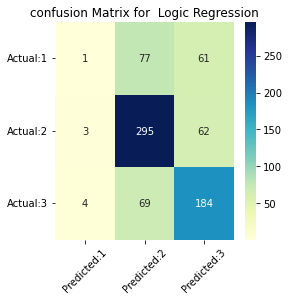

In [12]:
cm=confusion_matrix(Y_test,Y_test_hat_LR)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (4,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Logic Regression")
plt.xticks(rotation=45)
plt.yticks(rotation=360)

In [13]:
df_season2['predicted_result'] = Y_test_hat_LR
df_season2.head()

,Attack_Home_Home,AwayTeamChanse,HomeTeamChanse,Attack_Home_Away,Attack_Away_Home,Attack_Away_Away,Defensive_Home_Home,Defensive_Home_Away,Defensive_Away_Home,Defensive_Away_Away,...,HomeTeamID,AwayTeamID,HomeScore,AwayScore,HomeShots,AwayShots,Home,Draw,Away,predicted_result
756,0.695382,6.972222,23.798942,1.075669,0.599005,1.016915,1.162592,0.662786,2.047761,1.030846,...,2,1,1,2,14,16,6.32,5.02,1.49,2
757,0.890958,17.928571,16.933862,0.717113,0.835821,0.835821,0.499806,1.173458,1.253731,1.462687,...,28,3,5,1,25,7,1.39,5.81,7.17,1
758,1.206054,18.592593,16.018519,1.325572,1.518408,1.574129,0.575863,0.412883,0.752239,0.640796,...,27,4,0,1,7,15,2.12,3.84,3.35,2
759,0.586729,20.916667,15.560847,1.412495,0.529353,1.574129,1.119131,0.521537,1.615920,0.821891,...,26,5,2,6,7,27,27.20,10.17,1.12,2
760,0.543267,21.912698,14.645503,1.151727,0.599005,1.462687,1.206054,0.575863,1.741294,0.780100,...,25,6,0,3,6,17,12.38,7.60,1.22,2


#### > 2-2 ) Show Predicted : 

In [14]:
df_season2 = df_season2.groupby(['Gameweek'])

Score = {}
for team in range(1 , max(df['HomeTeamID'].unique()) + 1) : 
    Score[team] = 0

for week in range(1 , max(df['Gameweek'].unique()) + 1) : 
    new_df = df_season2.get_group(week)
    # if Home win Score = 1 ; if Away win Score = 2 ; else Draw = 0
    for team in range(1 , max(df['HomeTeamID'].unique()) + 1) : 
        if team in new_df['HomeTeamID'].tolist() : 
            if list(new_df[new_df['HomeTeamID'] == team]['predicted_result'])[0] == 0 : 
                Score[team] = Score[team] + 1
            if list(new_df[new_df['HomeTeamID'] == team]['predicted_result'])[0] == 1 : 
                Score[team] = Score[team] + 3
            else : 
                pass
        else : 
            if list(new_df[new_df['AwayTeamID'] == team]['predicted_result'])[0] == 0 : 
                Score[team] = Score[team] + 1
            if list(new_df[new_df['AwayTeamID'] == team]['predicted_result'])[0] == 2 : 
                Score[team] = Score[team] + 3
            else : 
                pass


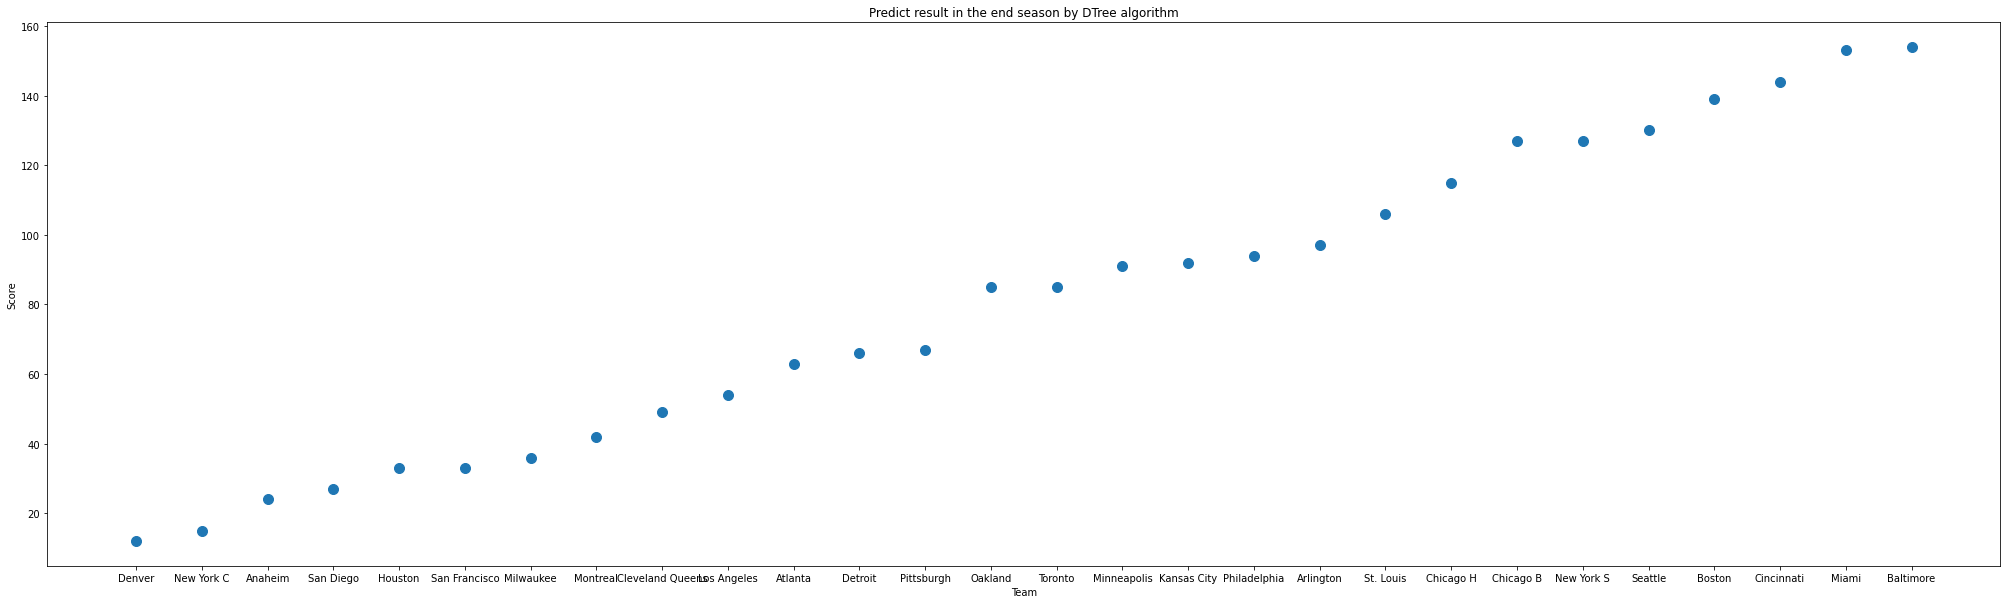

In [16]:
TeamName = df_Teams['TeamName'].tolist()
Team_ID = df_Teams['TeamID'].tolist()

pridect_result = {}
for team in range(0 , len(Team_ID)) : 
    pridect_result[TeamName[team]] = Score[Team_ID[team]]
# sort : 
pridect_result = {k: v for k, v in sorted(pridect_result.items(), key=lambda item: item[1])}

plt.figure(figsize=(35  , 10))
plt.plot(list(pridect_result.keys()) , list(pridect_result.values()) , 'o' , markersize=10)
plt.ylabel('Score')
plt.xlabel('Team')
plt.title('Predict result in the end season by DTree algorithm')

plt.show()

In [17]:
Table = {}
Table['Team'] = list(pridect_result.keys())
Table['Score'] = list(pridect_result.values())

df_res = pd.DataFrame.from_dict(Table)
df_res = df_res.sort_values(by=['Score'] , ascending=False).reset_index(drop = True)
df_res

,Team,Score
0,Baltimore,154
1,Miami,153
2,Cincinnati,144
3,Boston,139
4,Seattle,130
5,New York S,127
6,Chicago B,127
7,Chicago H,115
8,St. Louis,106
9,Arlington,97


In [ ]:
# reminder we considered Home win Score = 1 ; if Away win Score = 2 ; else Draw = 0
LR.classes_

In [ ]:
Proba = LR.predict_proba(X_test)
Home_Win_probability = Proba[:,1]
Away_Win_probability = Proba[:,2]
Draw_Win_probability = Proba[:,0]